<a href="https://colab.research.google.com/github/TrangPhuongTran/DataAnalyticsGroupProject/blob/main/RandomForestModel_group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required package



In [1]:
# importing all the packages we need in this notebook

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Preparing the file

In [2]:
#Importing file
from google.colab import files
uploaded = files.upload()
xls = pd.ExcelFile('/content/Clean_data_without_insights.xlsx')

#Defining the Data Frame
df_store = pd.read_excel(xls, 'store')
df_train = pd.read_excel(xls, 'Train_cleaned')
df_test = pd.read_excel(xls, 'Train_cleaned')

#Dataset preview
print(df_store.head())
print(df_train.head())
print(df_test.head())

Saving Clean_data_without_insights.xlsx to Clean_data_without_insights.xlsx
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                 1270                          9   
1      2         a          a                  570                         11   
2      3         a          a                14130                         12   
3      4         c          c                  620                          9   
4      5         a          a                29910                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

### Building the model

### Building the model
Notes: Both of these models (draft one and real one) **have not considered the date**. I am working on it.

In [7]:
# THIS IS A DRAFT. Do not run this.




from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Handling missing values in 'df_store' (e.g., 'PromoInterval' column)
df_store['PromoInterval'].fillna('None', inplace=True)

# Encoding categorical variables in 'df_store'
label_encoders = {}
for col in ['StoreType', 'Assortment', 'PromoInterval']:
    le = LabelEncoder()
    df_store[col] = le.fit_transform(df_store[col])
    label_encoders[col] = le

# Merge 'df_train' with 'df_store' on 'Store' (common column)
train_merged = pd.merge(df_train, df_store, on='Store')
test_merged = pd.merge(df_test, df_store, on='Store')

# Drop unnecessary columns from both datasets
train_merged = train_merged.drop(columns=['Date', 'Customers'])
test_merged = test_merged.drop(columns=['Date', 'Store'])

# Separate features and target variable from training data
X = train_merged.drop(columns=['Sales'])
y = train_merged['Sales']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
print(f"Validation RMSE: {rmse}")

# R-squared on the validation set
r2_val = rf_model.score(X_val, y_val)
print(f"R-squared on validation set: {r2_val}")


<ipython-input-7-72c26830368c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['PromoInterval'].fillna('None', inplace=True)


Validation RMSE: 1323.108313780581
R-squared on validation set: 0.8700608471502186


In [14]:
#The Random Forest model Im building. Run this.

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Handling missing values in 'df_store' (e.g., 'PromoInterval' column)
df_store['PromoInterval'].fillna('None', inplace=True)

# Encoding categorical variables in 'df_store'
label_encoders = {}
for col in ['StoreType', 'Assortment', 'PromoInterval']:
    le = LabelEncoder()
    df_store[col] = le.fit_transform(df_store[col])
    label_encoders[col] = le

# Merge 'df_train' and 'df_test' with 'df_store' on 'Store' (common column)
train_merged = pd.merge(df_train, df_store, on='Store')
test_merged = pd.merge(df_test, df_store, on='Store')
y_test = test_merged['Sales']

# Drop unnecessary columns from both datasets
train_merged = train_merged.drop(columns=['Date', 'Customers'])  # Remove Customers from training data
test_merged = test_merged.drop(columns=['Date', 'Customers', 'Sales'])  # Remove Customers and Sales from test data

# Separate features and target variable from training data
X_train = train_merged.drop(columns=['Sales', 'Store'])  # Sales is the target, Store should not be included in training
y_train = train_merged['Sales']

# Prepare the test data (make sure it has the same features as X_train)
X_test = test_merged.drop(columns=['Store'])  # Drop 'Store' from test data to match training features

# Train the Random Forest Regressor on the entire training dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

print("Predictions on the test set:", y_test_pred)

<ipython-input-14-c5d91bdc7c93>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['PromoInterval'].fillna('None', inplace=True)


Predictions on the test set: [ 5492.2485      5497.90833333  7616.27964286 ...  5500.85375
 10872.49        8054.31416667]


### With the dates as variable

In [3]:
# Preprocessing the date
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek

df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek

In [12]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Handling missing values in 'df_store' (e.g., 'PromoInterval' column)
df_store['PromoInterval'].fillna('None', inplace=True)

# Encoding categorical variables in 'df_store'
label_encoders = {}
for col in ['StoreType', 'Assortment', 'PromoInterval']:
    le = LabelEncoder()
    df_store[col] = le.fit_transform(df_store[col])
    label_encoders[col] = le

# Merge 'df_train' and 'df_test' with 'df_store' on 'Store' (common column)
train_merged = pd.merge(df_train, df_store, on='Store')
test_merged = pd.merge(df_test, df_store, on='Store')
y_test = test_merged['Sales']

# Drop unnecessary columns from both datasets
train_merged = train_merged.drop(columns=['Date', 'Customers'])  # Remove Customers from training data
test_merged = test_merged.drop(columns=['Date', 'Customers', 'Sales'])  # Remove Customers and Sales from test data

# Separate features and target variable from training data
X_train = train_merged.drop(columns=['Sales', 'Store'])  # Sales is the target, Store should not be included in training
y_train = train_merged['Sales']

# Prepare the test data (make sure it has the same features as X_train)
X_test = test_merged.drop(columns=['Store'])  # Drop 'Store' from test data to match training features

# Train the Random Forest Regressor on the entire training dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_with_date = rf_model.predict(X_test)

print("Predictions on the test set:", y_test_pred_with_date)

<ipython-input-12-1f3255a28ed0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['PromoInterval'].fillna('None', inplace=True)


Predictions on the test set: [6452.   6626.96 8208.22 ... 5590.35 9200.98 6149.71]


### Measuring the significance of variables within the random forest model

In [24]:
importances = rf_model.feature_importances_
df_important_feature = pd.DataFrame({'column_name': X_train.columns, 'significance_degree': importances})
df_important_feature = df_important_feature.sort_values(by='significance_degree', ascending = False).reset_index()
df_important_feature

,index,column_name,significance_degree
0,1,Open,0.429211
1,10,CompetitionDistance,0.183495
2,2,Promo,0.069440
3,12,CompetitionOpenSinceYear,0.062473
4,11,CompetitionOpenSinceMonth,0.060529
5,7,Day,0.049999
6,8,StoreType,0.027714
7,14,Promo2SinceWeek,0.025280
8,0,DayOfWeek,0.023265
9,15,Promo2SinceYear,0.022956


### Evaluating the model

In [25]:
print("Predictions on the test set:", y_test_pred_with_date)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_test_pred_with_date)

# Calculate R-squared
r_squared_ = r2_score(y_train, y_test_pred_with_date)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Squared Mean Squared Error (RMSE): {mse**0.5}")
print(f"R-squared: {r_squared_}")

Predictions on the test set: [6452.   6626.96 8208.22 ... 5590.35 9200.98 6149.71]
Mean Squared Error (MSE): 308642.44638782233
Squared Mean Squared Error (RMSE): 555.5559795266561
R-squared: 0.9763058822014171


In [23]:
y_train = rf_model.predict(X_train)
print("Predictions on the test set:", y_train_pred_with_date)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_train_pred_with_date)

# Calculate R-squared
r_squared_train = r2_score(y_test, y_test_pred_with_date)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared_train}")

Predictions on the test set: [6452.   6626.96 8208.22 ... 5590.35 9200.98 6149.71]
Mean Squared Error (MSE): 308642.44638782233
R-squared: 0.9763058822014171


In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],  # Test different tree depths
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 5, 10],  # Minimum number of samples at leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for best split
}

# Initialize GridSearchCV with the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the Random Forest with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Predict using the best model
y_test_pred_tuned = best_rf_model.predict(X_test)

# Evaluate performance
tuned_mse = mean_squared_error(y_test, y_test_pred_tuned)
print(f"Tuned MSE: {tuned_mse}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
119 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned MSE: 459335.0651679745


In [9]:
# Looking at the result using Data Frame
df_check = df_train
df_check['RF_predict_sale'] = y_test_pred
df_check

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,RF_predict_sale
0,1,5,2015-07-31,5263,555,1,1,0,1,5492.248500
1,2,5,2015-07-31,6064,625,1,1,0,1,5497.908333
2,3,5,2015-07-31,8314,821,1,1,0,1,7616.279643
3,4,5,2015-07-31,13995,1498,1,1,0,1,12052.251667
4,5,5,2015-07-31,4822,559,1,1,0,1,4704.315000
...,...,...,...,...,...,...,...,...,...,...
16378,843,5,2015-07-17,9221,1014,1,1,0,1,10819.829500
16379,844,5,2015-07-17,3979,408,1,1,0,1,5237.833333
16380,845,5,2015-07-17,5666,390,1,1,0,1,5500.853750
16381,846,5,2015-07-17,9363,855,1,1,0,1,10872.490000


# Trying to Visualize it
I am visualizing it on the Test dataset.

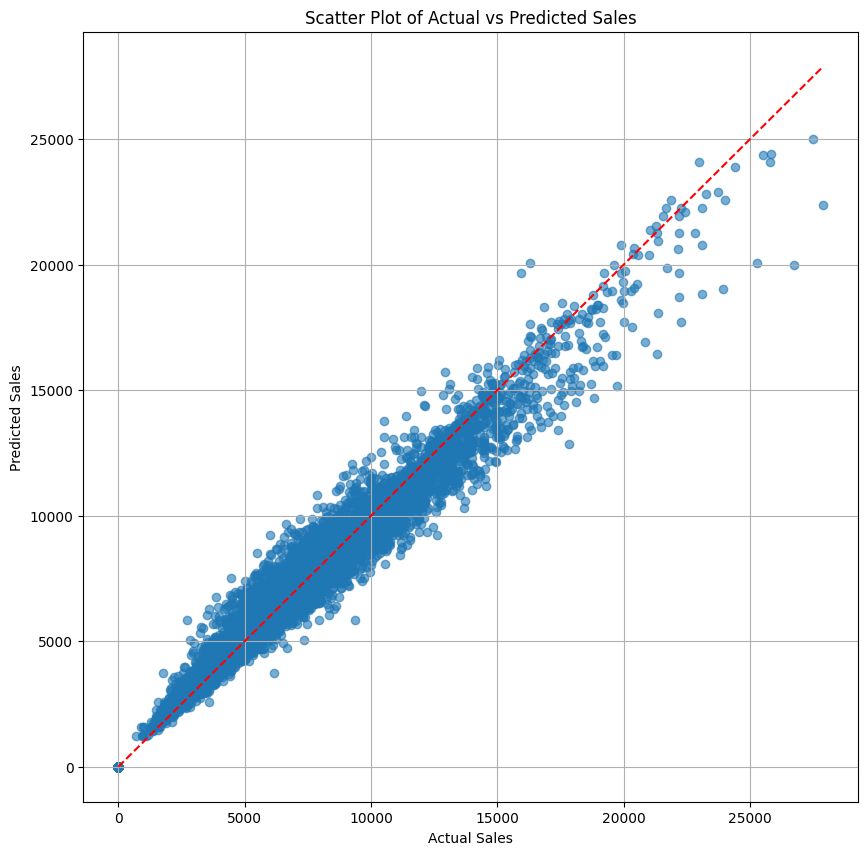

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(df_check['Sales'], df_check['RF_predict_sale'], alpha=0.6)
plt.title('Scatter Plot of Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([df_check['Sales'].min(), df_check['Sales'].max()],
         [df_check['Sales'].min(), df_check['Sales'].max()],
         color='red', linestyle='--')  # Diagonal line for reference
plt.grid()
plt.show()


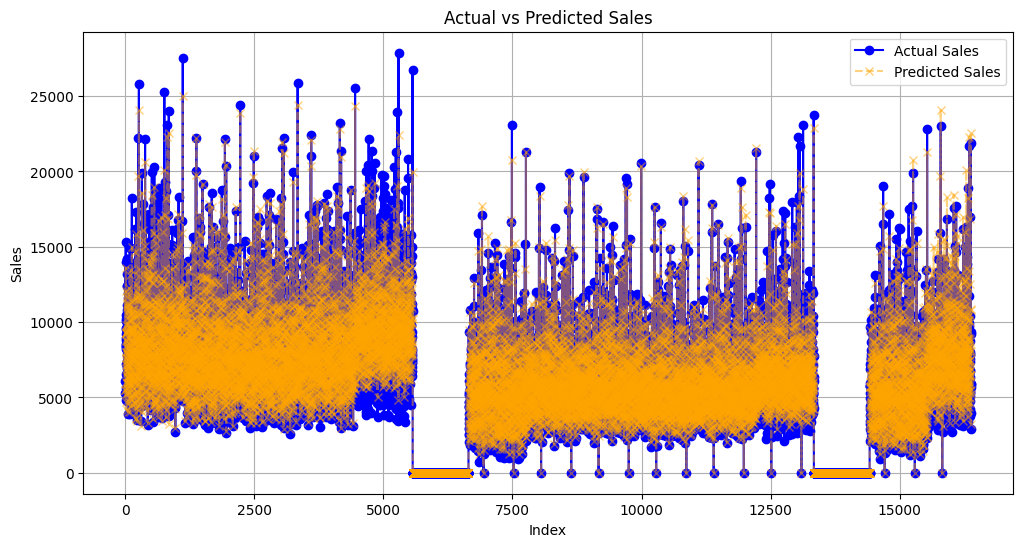

In [18]:
# y_test is the actual sales values in the Test dataset and y_test_pred are the predicted value.
# Create a line plot to compare actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Sales', color='blue', marker='o', linestyle='-')
plt.plot(y_test_pred, label='Predicted Sales', color='orange', marker='x', linestyle='--', alpha=0.5) #alpha is the opacity :)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [13]:
df_test['Sales'].describe()

,Sales
count,16383.000000
mean,6036.170726
std,3609.281949
min,0.000000
25%,4168.000000
50%,5985.000000
75%,7996.000000
max,27881.000000


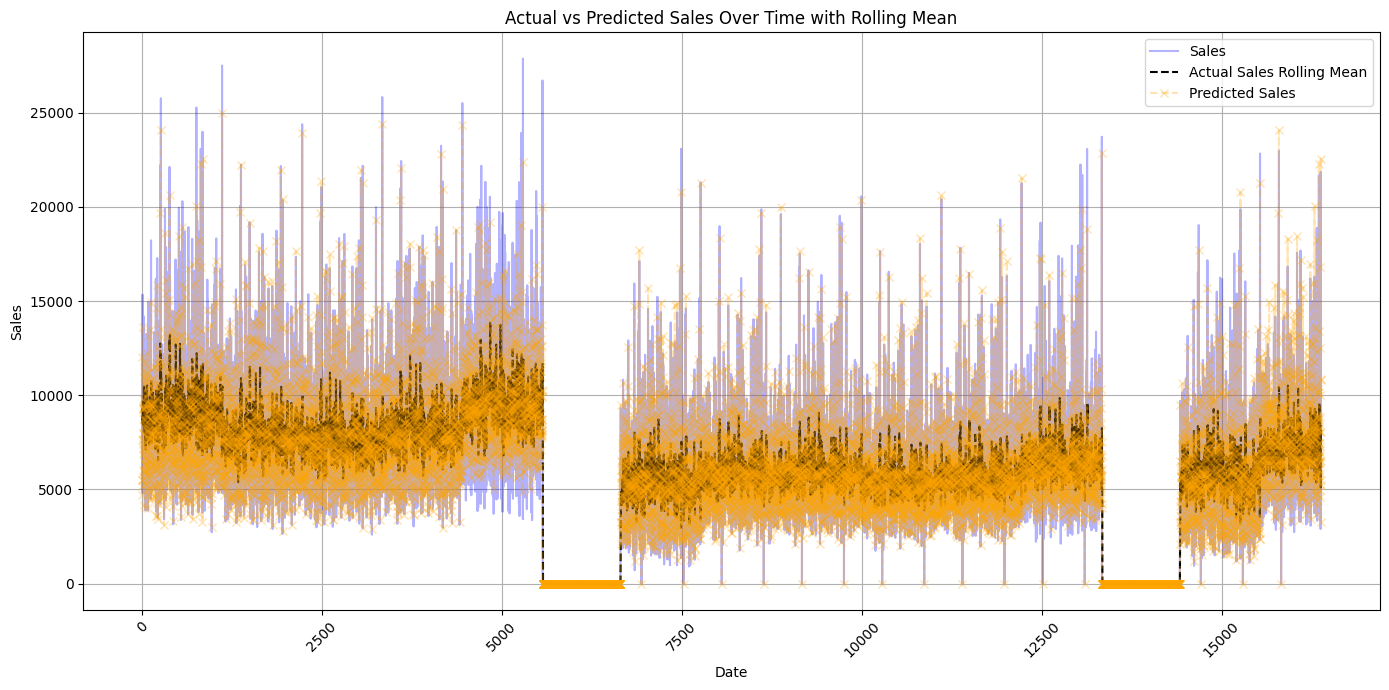

In [21]:
# Adding a rolling average to the DataFrame for actual sales
df_check['Actual Sales Rolling Mean'] = df_check['Sales'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_check.index, df_check['Sales'], label='Sales', color='blue', alpha=0.3)
plt.plot(df_check.index, df_check['Actual Sales Rolling Mean'], label='Actual Sales Rolling Mean', color='black', linestyle='--')
plt.plot(df_check.index, df_check['RF_predict_sale'], label='Predicted Sales', color='orange', marker='x', linestyle='--', alpha=0.3)
plt.title('Actual vs Predicted Sales Over Time with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()